# This notebook covers the process of cleaning "Google Play Store.csv" dataset. Edited by Nguyen Hanh Tu
![](https://i.imgur.com/nmatSzM.png)

## Are you ready to rumbllllllllllllllle?  Let's go

____

# 1. Import the dataset, and create the dataframe


## 1.1 Import the libraries and google drive

Before exploring the data, we must import the compulsory dataset and Python libraries for further work.


In [0]:
# We need the following libraries: io, numpy, pandas, seaborn and mathplotlib.

import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Next, we intilize the connection to google drive to acess our dataset online

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Then, our dataset in .csv need to be put into a dataframe by pandas

In [0]:
# Next, we use pandas to put our dataset into a dataframe. 
df=pd.read_csv('/content/drive/My Drive/google-play-store.csv')

## 1.2 An overview of Play Store Dataset

Let's preview the structure of our dataframe. 


In [0]:
# Show the first 5 rows of the dataframe
df.head()

In [0]:
# Show the last 5 rows of the dataframe

df.tail()

In [0]:
# Show the number of rows and columns, in format (num_row,num_col)
df.shape

In [0]:
# This code will return the datatypes of all columns

df.dtypes

___ 
##Conclusion
This step gives us the information about number of apps that are divided into specific categories. The data might have outliners or missing values due to the fach that data types are heavility defined as Objects.
To be more clear about the presence of outliners or nulls, we shall carry on the data cleaning procedure.
___


# 2. Data Cleaning

## 2.1 Duplicate records removal
It is common to see duplicates in a dataset, and this can affect the accuracy of data analysis. Moreover, such data could cause error in processing algorithms, so we need to deal with it first.

```"inplace = True" ``` means that all the manipulations will be done and stored in the dataset we are using now.


In [4]:
# 
df.drop_duplicates(subset='App', keep='first', inplace = True)
df.shape

(9660, 13)

After removing duplicates, our number of rows decreased from 10841 to 9960.



## 2.2 Missing Values
Not only the datasets usually have duplicates, but they also commonly contain missing values.
First, we should get the exact amount of missing values in every column for our dataset.

In [5]:
# Panda allow us to do a sequence of operations in a single line. So first we determine the null, then sum all of them, and sorting.
df.isnull().sum().sort_values(ascending=False)

Rating            1463
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
Last Updated         0
Genres               0
Price                0
Installs             0
Size                 0
Reviews              0
Category             0
App                  0
dtype: int64

Let's get rid of all the rows with missing values.


In [6]:
# dropna() method removes all the missing values with set parameters to have expected results.

df.dropna(how ='any', inplace = True)
df.shape

(8190, 13)

The dataset now contains only 8886 rows and 13 columns. Let's start cleaning the columns in sequence.

In [0]:
df.to_csv('/content/drive/My Drive/cleaned_Google_Play_Store.csv')

##2.3 "App"

This columns can be irgoned after we remove the duplicates and missing values of the whole dataset.



## 2.4 "Category"

In [0]:
# Check the unique data to see outliners and nones.
df["Category"].value_counts()

In [0]:
df.Category.value_counts().plot(kind='bar', figsize=(10,4))

## 2.5 "Rating"

In [0]:
df["Rating"].value_counts()

In [0]:
print("Range: ", df.Rating.min(),"-",df.Rating.max())
df.Rating.dtype

In [8]:
print(df.Rating.isna().sum(),"none values out of", len(df.Rating))

0 none values out of 8190


In [0]:
df.Rating.hist(figsize=(22,7));
plt.xlabel('Rating')
plt.ylabel('Frequency')

Look like there are no need to clean this column.

## 2.3 "Reviews"

In [0]:
df["Reviews"].value_counts()
# This column has no outliners or missing values.

In [0]:
# Convert this column into integer
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))


### this column is clean enough.

## 2.4 Check column "Size"

In [0]:
df['Size'].value_counts()

# There are distortion in the data, some have K as the size, others have M

In [0]:
# convert Size to MB, replace "varies with devices" by mean of the column.

df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))

In [11]:
# Change NaN into mean of the colummn
df['Size'].fillna(df['Size'].mean(), inplace=True)
df['Size']=round(df['Size'],0)
df['Size'].unique()

array([ 19.,  14.,   9.,  25.,   3.,   6.,  29.,  33.,  28.,  12.,  20.,
        21.,  37.,  17.,  39.,  31.,   4.,  23.,   5.,  11.,  24.,  22.,
        15.,  10.,   1.,  26.,   8.,  56.,  57.,  35.,  54.,   0.,   2.,
        27.,   7.,  16.,  38.,  32.,  18.,  52.,  30.,  13.,  73.,  42.,
        55.,  51.,  41.,  48.,  46.,  40.,  61.,  66.,  44.,  53.,  45.,
        63.,  49.,  77.,  70.,  36.,  84.,  97.,  47.,  76.,  59.,  78.,
        72.,  43.,  93.,  65.,  79., 100.,  58.,  50.,  68.,  64.,  34.,
        67.,  60.,  94.,  99.,  95.,  80.,  74.,  62.,  69.,  75.,  98.,
        85.,  82.,  96.,  87.,  71.,  86.,  91.,  81.,  92.,  83.,  88.,
        89.,  90.])

In [0]:
df.hist(column='Size', figsize=(10,4))
plt.xlabel('Size (MB)')
plt.ylabel('Frequency')

## 2.4 Check column "Installs"

In [0]:
df['Installs'].value_counts()

In [0]:
# Remove "+" and "," in Installs column. Then convert this column into number

df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

## 2.5 Check column "Type"

In [0]:
df['Type'].value_counts()

## 2.6 Check column "Price"

In [0]:
df['Price'].unique()

In [0]:
# Removethe dollar sign and turn values into numeric type.

df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
df['Price'] = df['Price'].apply(lambda x: float(x))

In [0]:
# Let check if there are any user who pay >350 dollars for an app.
temp=df.Price.apply(lambda x: True if x>350 else False)
df[temp]

## 2.7 Check column "Content Rating

In [0]:
df['Content Rating'].value_counts()

In [0]:
df['Content Rating'].value_counts().plot(kind='bar', figsize=(8,5))

In [0]:
df.to_csv('/content/drive/My Drive/V2_Cleaned_GPS.csv')

## 2.8 Check column "Genres"

In [0]:
df['Genres'].value_counts()

In [0]:
# Split "Genres" column into two column. The first column is for the first genres, we named it as primary genres. The other one is named sub genres.
primary_gen = df['Genres'].apply(lambda x: x.split(';')[0])
df['Primary Genres'] = primary_gen
df['Primary Genres']

In [0]:
df['Secondary Genres']= df.Genres.apply(lambda x: x.split(';')[-1])
df['Secondary Genres'].unique()



In [0]:
grouped_gen = df.groupby(['Primary Genres','Secondary Genres'])
grouped_gen.size()



In [0]:
two_genres_table = pd.crosstab(index=df["Primary Genres"],columns=df["Secondary Genres"])
two_genres_table.head()

In [0]:
two_genres_table.plot(kind="barh", figsize=(12,20),stacked=True);
plt.legend(bbox_to_anchor=(1.0,1.0))

## 2.10 Clean column "Last Update"

In [0]:
df['Last Updated'].value_counts()
df['Last Updated'].unique()

In [0]:
from datetime import datetime,date
temp=pd.to_datetime(df['Last Updated'])
temp.head()

df['Time from last update'] = temp.apply(lambda x:date.today()-datetime.date(x))
df['Time from last update'].head()

In [0]:
plt.figure(figsize=(15,6))
ax = sns.pairplot(df, hue="Type")
plt.show()

# 2.11 Current Ver

In [0]:
df['Current Ver'].unique()

In [0]:
df['Current Ver'].isna().sum()

In [0]:
df

In [0]:
# 2. 11 

In [0]:
# df[['pahun_1','pahun_2']]=df['Genres'].str.split(';', expand=True,n=1)


In [0]:
# df['genres'].unique()

In [0]:

# df["Price"] = df["Price"].apply(convert_dollar_to_none)
# df["Price"].unique()

In [0]:
# # convert reviews to float
# df['Reviews'] = df['Reviews'].apply(lambda x: float(x))
# df['Reviews']

In [0]:
# import tkinter as tk
# from tkinter import filedialog
# from pandas import DataFrame

# root= tk.Tk()

# canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
# canvas1.pack()

# def exportCSV ():
#     global df
    
#     export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
#     df.to_csv (export_file_path, index = None, header=True)

# saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
# canvas1.create_window(150, 150, window=saveAsButton_CSV)

# root.mainloop()

In [0]:
# df.to_csv('/content/drive/My Drive/e.csv')

In [0]:
# df['Genres2']=df['Genres'].split(";")

# df


Text(0, 0.5, 'Category')

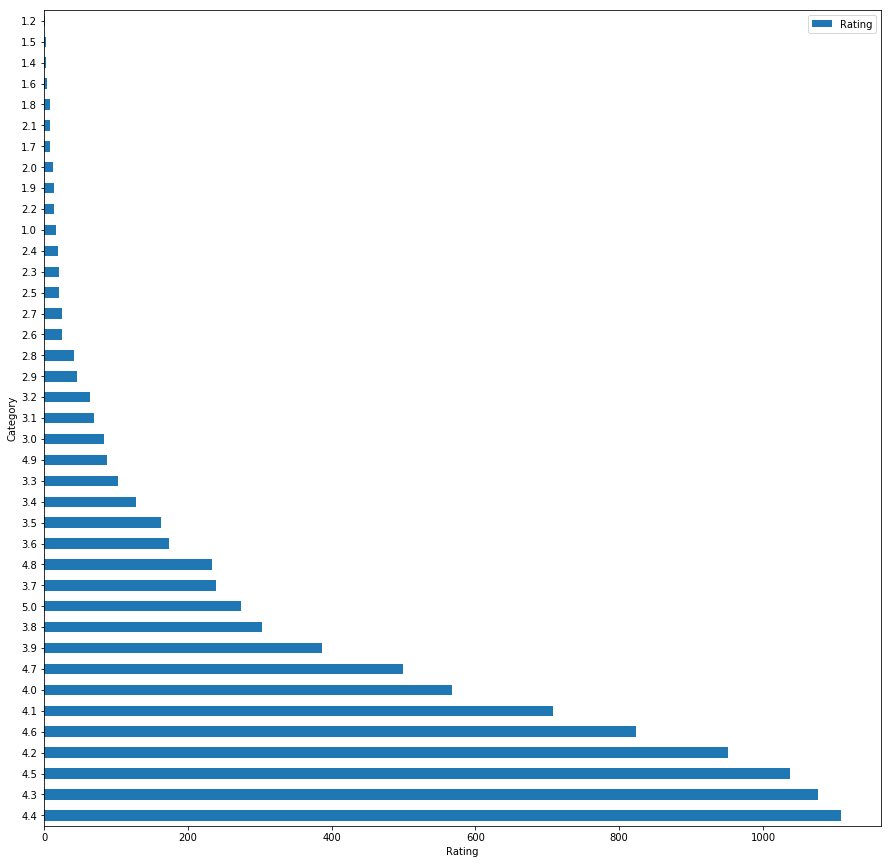

In [0]:
import os
df['Rating'].value_counts().plot(kind="barh", figsize=(15,15));
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.xlabel('Rating')
plt.ylabel('Category')

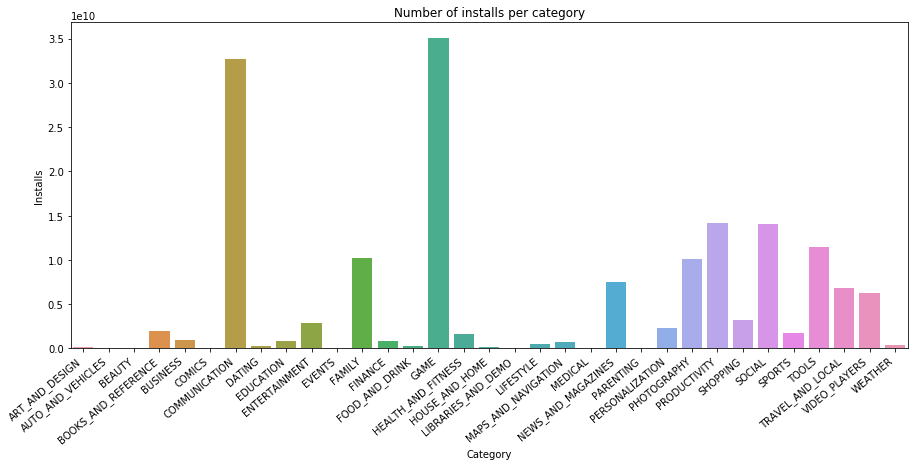

In [0]:
# Number of install per category

plt.figure(figsize = (15, 6))
plt.title('Number of installs per category')
install_per_category = df.groupby("Category")['Installs'].sum().reset_index()
ax = sns.barplot(x="Category", y="Installs", data=install_per_category)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.show()

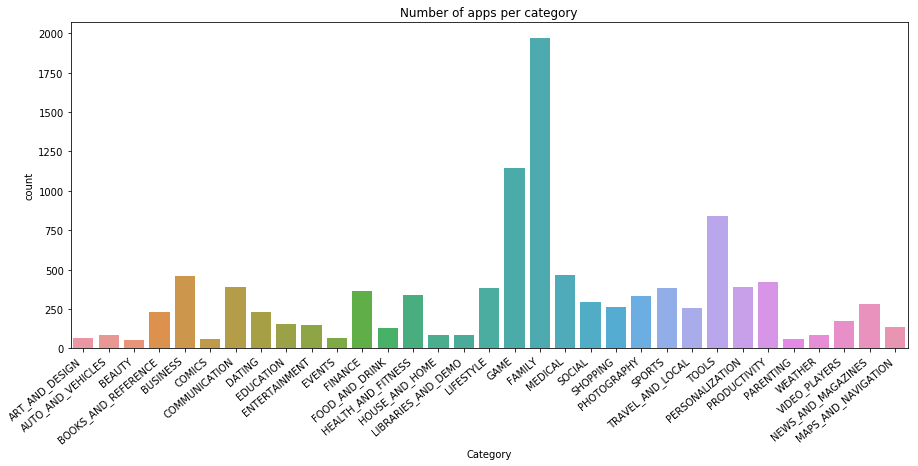

In [0]:
# Number of apps per category
plt.figure(figsize=(15,6))
plt.title('Number of apps per category')
ax = sns.countplot(x='Category',data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.show()

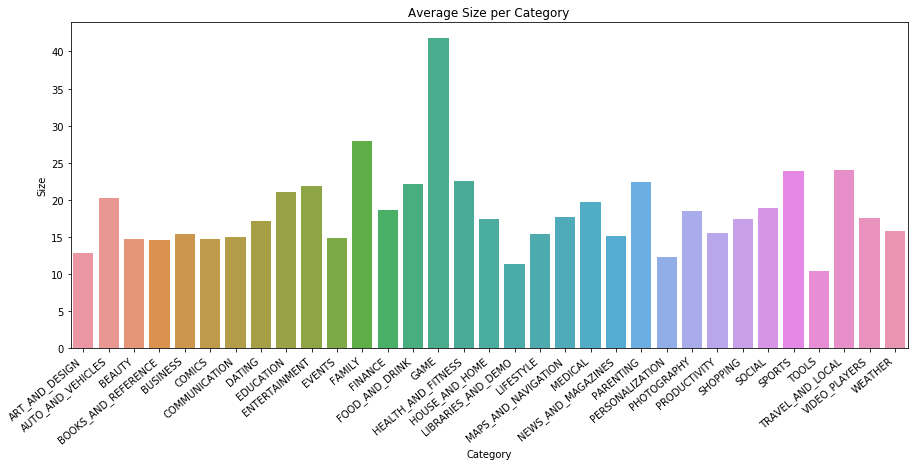

In [0]:
plt.figure(figsize = (15, 6))
plt.title('Average Size per Category')
size_per_category = df.groupby("Category")['Size'].mean().reset_index()
ax = sns.barplot(x="Category", y="Size", data=size_per_category)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.show()

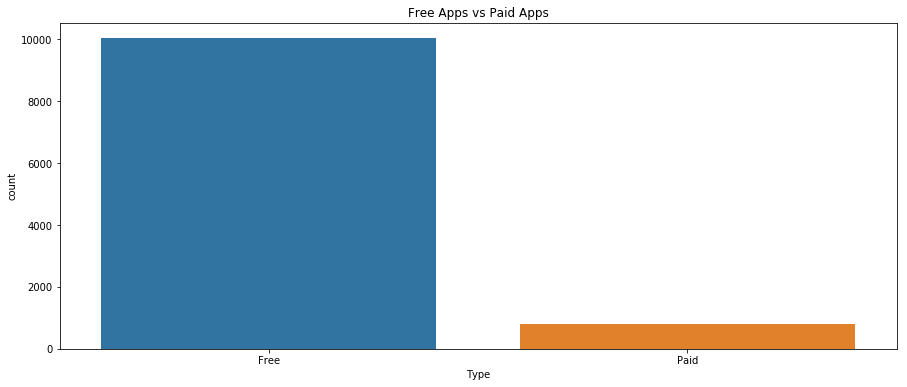

In [0]:
plt.figure(figsize=(15,6))
plt.title('Free Apps vs Paid Apps')
ax = sns.countplot(x='Type',data = df)
plt.show()

In [0]:
print("Percentage of free apps: ", round(len(df[df['Type'] == "Free"])/len(df)*100, 2))

Percentage of free apps:  92.61


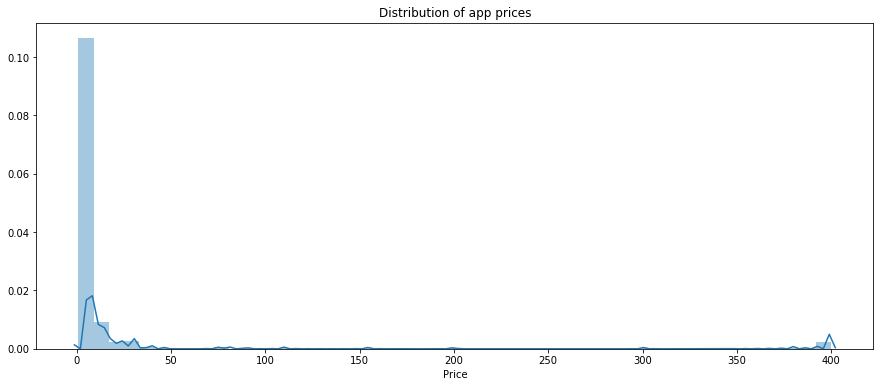

In [0]:
paid_apps = df[df['Price']!=0]
plt.figure(figsize=(15,6))
plt.title('Distribution of app prices')
ax = sns.distplot(paid_apps['Price'])
plt.show()

In [0]:
paid_apps[paid_apps['Price'] >= 300]

App   Category  ...  Current Ver   Android Ver
4197             most expensive app (H)     FAMILY  ...          1.0    7.0 and up
4362                         💎 I'm rich  LIFESTYLE  ...        1.0.0    4.4 and up
4367           I'm Rich - Trump Edition  LIFESTYLE  ...        1.0.1    4.1 and up
5351                          I am rich  LIFESTYLE  ...          2.0  4.0.3 and up
5354                     I am Rich Plus     FAMILY  ...          3.0    4.4 and up
5356                  I Am Rich Premium    FINANCE  ...          1.6    4.0 and up
5357                I am extremely Rich  LIFESTYLE  ...          1.0    4.0 and up
5358                         I am Rich!    FINANCE  ...          1.0    4.1 and up
5359                 I am rich(premium)    FINANCE  ...          3.4    4.4 and up
5362                      I Am Rich Pro     FAMILY  ...         1.54    1.6 and up
5364     I am rich (Most expensive app)    FINANCE  ...            2  4.0.3 and up
5366                          I Am Rich     FAMILY  ...          1.5    4.2 and up
5369                          I am Rich    FINANCE  ...          1.0    4.2 and up
5373                 I AM RICH PRO PLUS    FINANCE  ...        1.0.2    4.1 and up
9917                        Eu Sou Rico    FINANCE  ...          1.0  4.0.3 and up
9934  I'm Rich/Eu sou Rico/أنا غني/我很有錢  LIFESTYLE  ...        MONEY    4.1 and up

[16 rows x 13 columns]

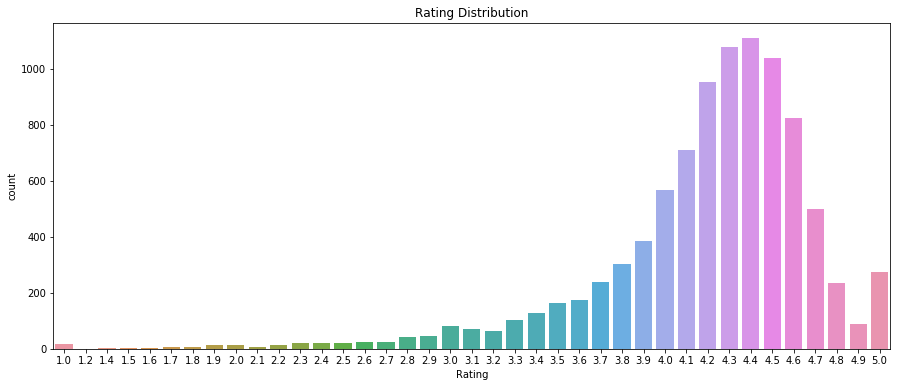

In [0]:
plt.figure(figsize=(15,6))
plt.title('Rating Distribution')
ax = sns.countplot(x='Rating', data=df)
plt.show()

#3. Data Visualization

In [0]:
df.describe()

Rating       Reviews         Size      Installs        Price
count  8886.000000  8.886000e+03  8886.000000  8.886000e+03  8886.000000
mean      4.187959  4.730928e+05    22.796534  1.650061e+07     0.963526
std       0.522428  2.906007e+06    21.420190  8.640413e+07    16.194792
min       1.000000  1.000000e+00     0.000000  1.000000e+00     0.000000
25%       4.000000  1.640000e+02     6.000000  1.000000e+04     0.000000
50%       4.300000  4.723000e+03    20.000000  5.000000e+05     0.000000
75%       4.500000  7.131325e+04    27.000000  5.000000e+06     0.000000
max       5.000000  7.815831e+07   100.000000  1.000000e+09   400.000000

## Which categories have the highest number of apps?


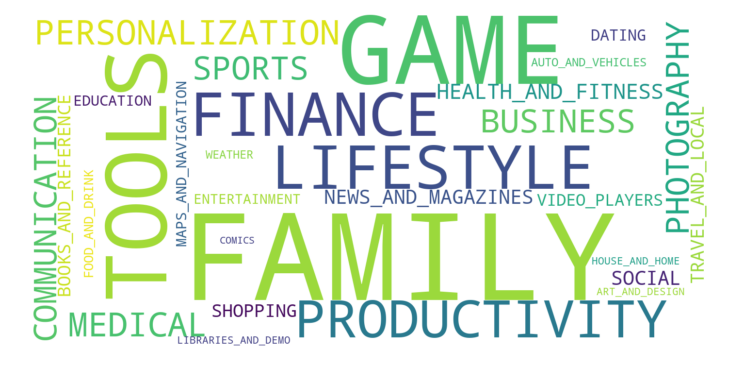

In [15]:
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud
import seaborn as sns
color = sns.color_palette()

%matplotlib inline


from plotly import tools
from plotly.offline import iplot, init_notebook_mode
from IPython.display import Image
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
py.init_notebook_mode()

wc = WordCloud(max_font_size=250,collocations=False, 
               max_words=30,width=1400, height=700,background_color="white").generate(' '.join(df['Category']))
plt.figure( figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Exploring app ratings across top categories


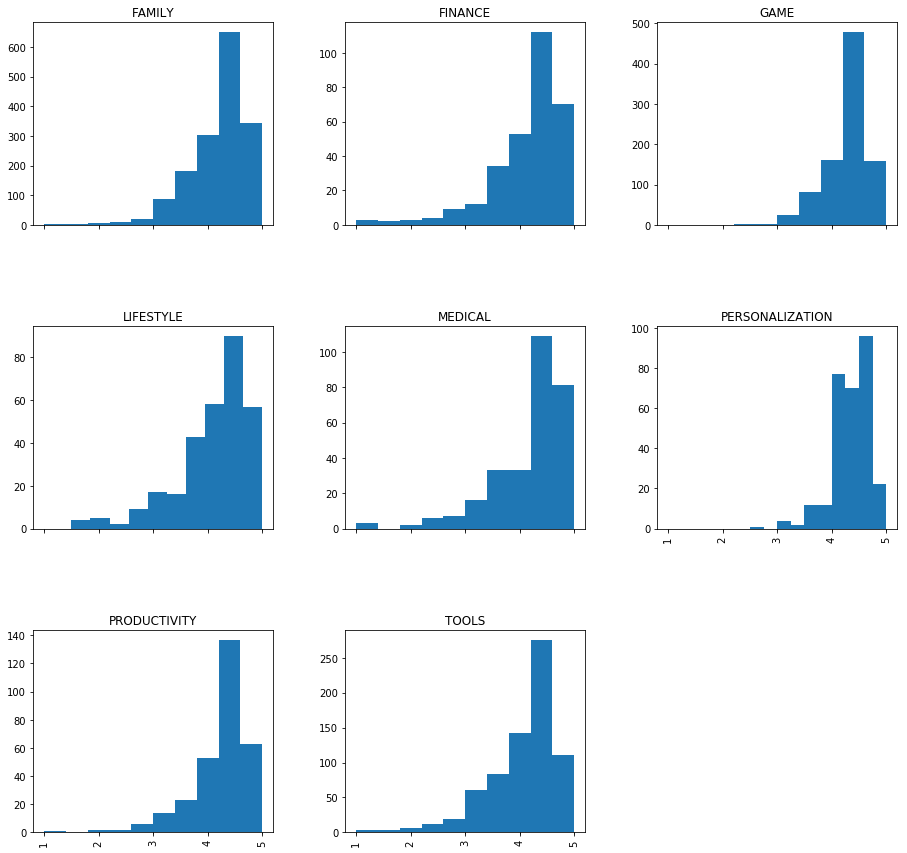

In [16]:
groups = df.groupby('Category').filter(lambda x: len(x) > 286).reset_index()
array = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(15,15))

We can see that the average app ratings are quit different between the top categories.

<!-- How does size of the app impact rating?

Despite the fact that modern phones and pads have enough memory to deal with various kinds of tasks and store Gigabytes of data, the size of the apps still matters. Let's explore whether this value really affects app rating or not.

To find an answer to this question, we will use scatterplot which is definitely the most common and informant way to see how two variables correlate. -->


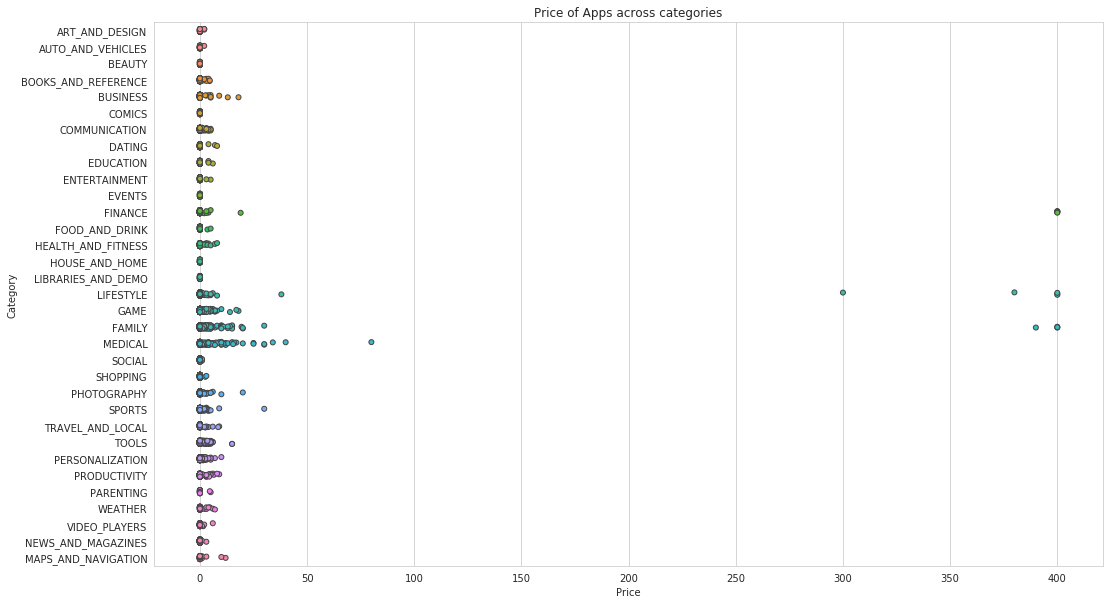

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 10)
p = sns.stripplot(x="Price", y="Category", data=df, jitter=True, linewidth=1)
title = ax.set_title('Price of Apps across categories')

In [22]:
# Let check the category that has apps cost more than 100$
df[['Category', 'App']][df.Price > 100].groupby([ "Category"], as_index=False).count()

Category  App
0     FAMILY    4
1    FINANCE    6
2  LIFESTYLE    5

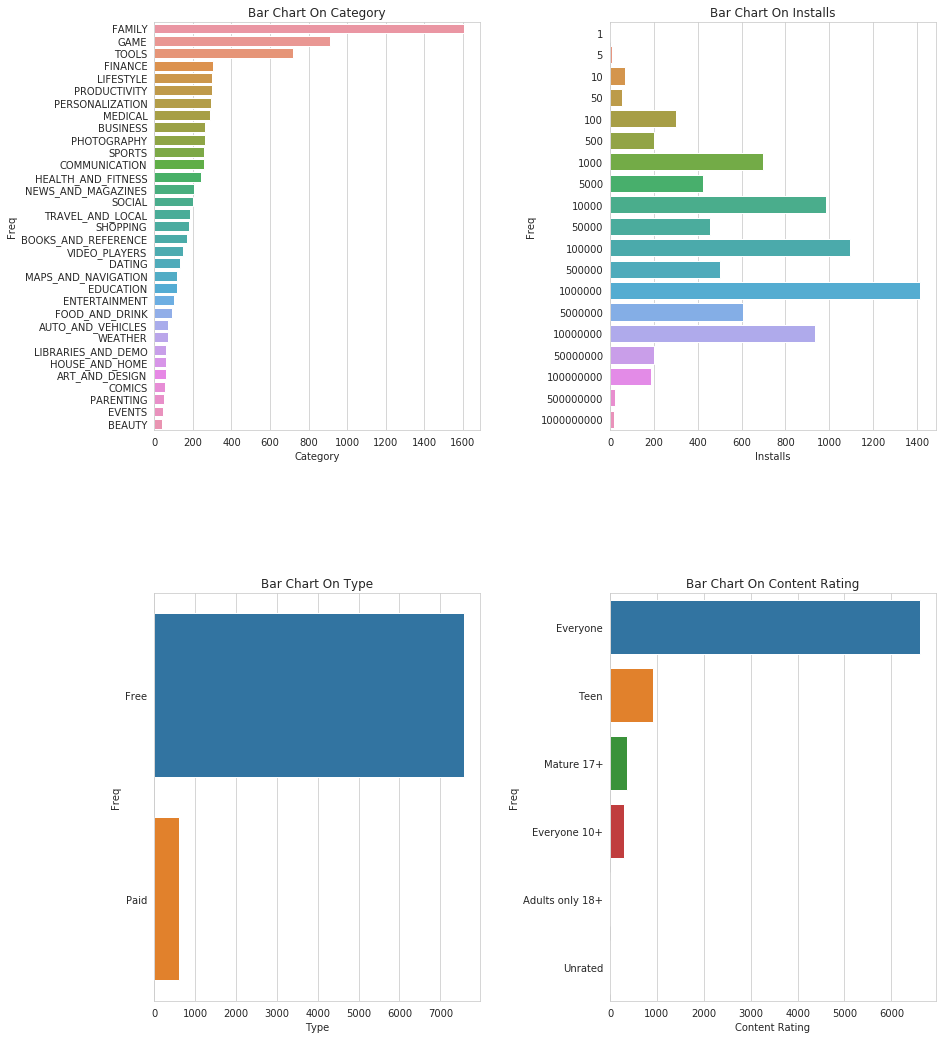

In [27]:
list_1 = ['Category', 'Installs', 'Type', 'Content Rating']
def bar_plot(x,y,y_label,x_label,title,color,ax):
    # plt.figure(figsize=(10,5))
    bar = sns.barplot(x = x,y=y,ax=ax,orient='h')
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    return bar

fig = plt.figure(figsize=(14,18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i = 1
for names in list_1:
    ax1 = fig.add_subplot(2, 2, i)
    df2 = df[names].value_counts()
    df2 = df2.reset_index()
    bar_plot(x = df2[names],y = df2['index'],y_label = 'Freq',title = 'Bar Chart On {}'.format(names),color='red',ax=ax1,x_label=names)
    i += 1




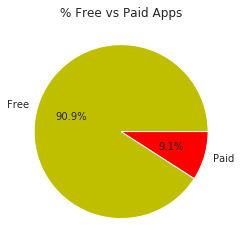

In [37]:
size=[10000,1000]
sentiment = ['Free', 'Paid']
colors = ['y', 'r']
plt.pie(size, labels=sentiment, colors=colors, autopct='%.1f%%')
plt.title('% Free vs Paid Apps')
plt.show()